In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.regression.linear_model import OLS
from functions import ARX, ccfplot, lagdf, validate

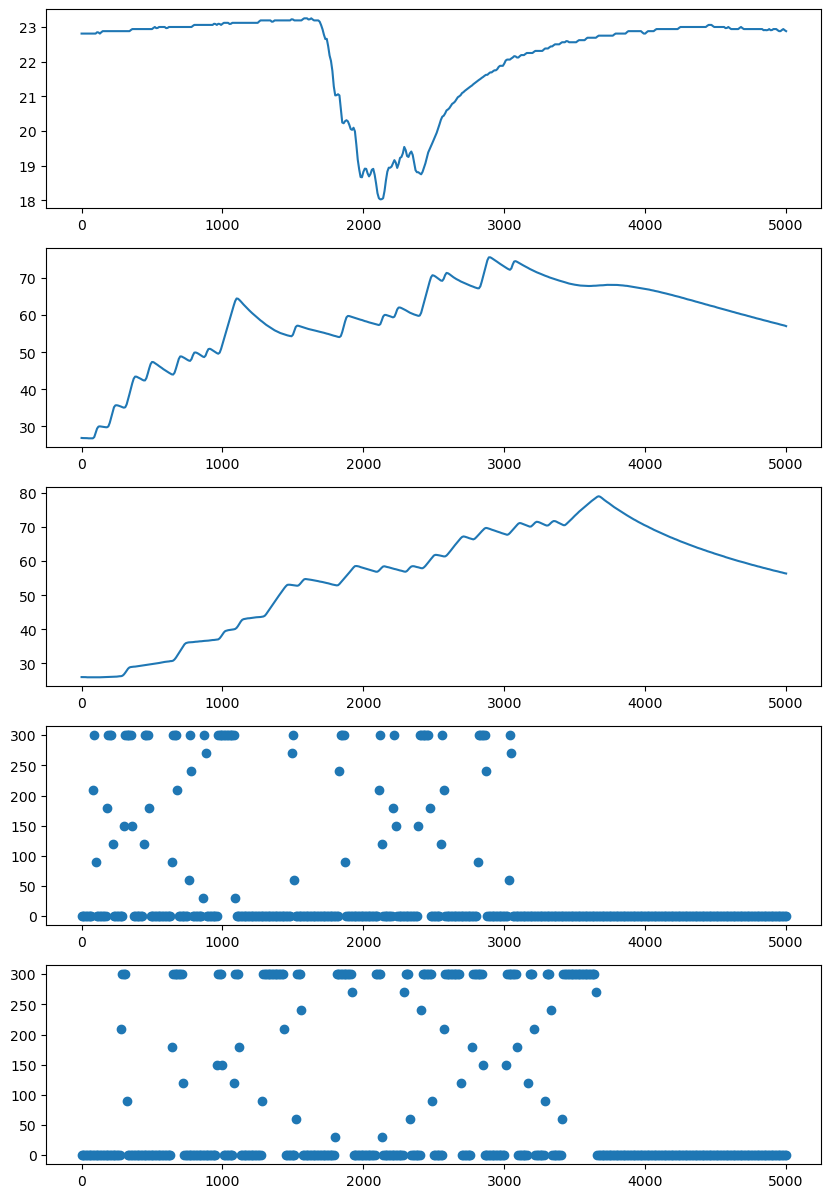

In [2]:

# Make plots
X = pd.read_csv("data/experiment1.csv", sep=",", header=0)
# Convert to t_1 = 0
X['t'] = X['t'] - X['t'][0]

plt.figure(figsize=(10, 15))
plt.subplot(511)
plt.plot(X['t'], X['Ta'])
plt.subplot(512)
plt.plot(X['t'], X['Tinner'])
plt.subplot(513)
plt.plot(X['t'], X['Touter'])
plt.subplot(514)
plt.scatter(X['t'], X['Pinner'])
plt.subplot(515)
plt.scatter(X['t'], X['Pouter'])
plt.show()


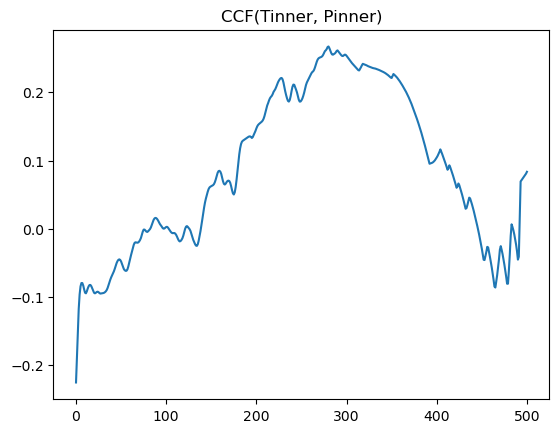

In [3]:
plt.plot(ccf(X['Tinner'], X['Pinner']))
plt.title('CCF(Tinner, Pinner)')
plt.show()



In [4]:
# Use the lagdf to make lags
X_lagged = lagdf(X.iloc[:, 1:6], 1)

# Add the lags to X
maxlag = 10
for i in range(1, maxlag + 1):
    tmp = lagdf(X.iloc[:, 1:6], i)
    tmp.columns = [f'{col}.l{i}' for col in tmp.columns]
    X = pd.concat([X, tmp], axis=1)

# Fit an ARX Removed l1  from names?
model_formula = "Tinner ~ Tinner + Pinner + Touter"
fit = OLS.from_formula(model_formula, data=X).fit()
print(fit.summary())



                            OLS Regression Results                            
Dep. Variable:                 Tinner   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.211e+30
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:21:01   Log-Likelihood:                 14572.
No. Observations:                 501   AIC:                        -2.914e+04
Df Residuals:                     497   BIC:                        -2.912e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.508e-14    1.6e-14      2.811      0.0

In [5]:
# Function for making a formula for lm
print(ARX("Tinner", ["Touter"], 1))
print(ARX("Tinner", ["Touter", "Pouter"],11))# Fit and print
fit = OLS.from_formula(ARX("Tinner", ["Touter"], 1), data=X).fit()
print(fit.summary())

Tinner ~ 0 + Tinner.shift(1) + Touter.shift(1)
Tinner ~ 0 + Tinner.shift(1) + Tinner.shift(2) + Tinner.shift(3) + Tinner.shift(4) + Tinner.shift(5) + Tinner.shift(6) + Tinner.shift(7) + Tinner.shift(8) + Tinner.shift(9) + Tinner.shift(10) + Tinner.shift(11) + Touter.shift(1) + Touter.shift(2) + Touter.shift(3) + Touter.shift(4) + Touter.shift(5) + Touter.shift(6) + Touter.shift(7) + Touter.shift(8) + Touter.shift(9) + Touter.shift(10) + Touter.shift(11) + Pouter.shift(1) + Pouter.shift(2) + Pouter.shift(3) + Pouter.shift(4) + Pouter.shift(5) + Pouter.shift(6) + Pouter.shift(7) + Pouter.shift(8) + Pouter.shift(9) + Pouter.shift(10) + Pouter.shift(11)
                                 OLS Regression Results                                
Dep. Variable:                 Tinner   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          

1     -0.044650
2     -0.012463
3     -0.011856
4     -0.037256
5     -0.056347
         ...   
496   -0.109455
497   -0.096888
498   -0.115135
499   -0.097179
500   -0.158784
Length: 500, dtype: float64
Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       491, 492, 493, 494, 495, 496, 497, 498, 499, 500],
      dtype='int64', length=500)


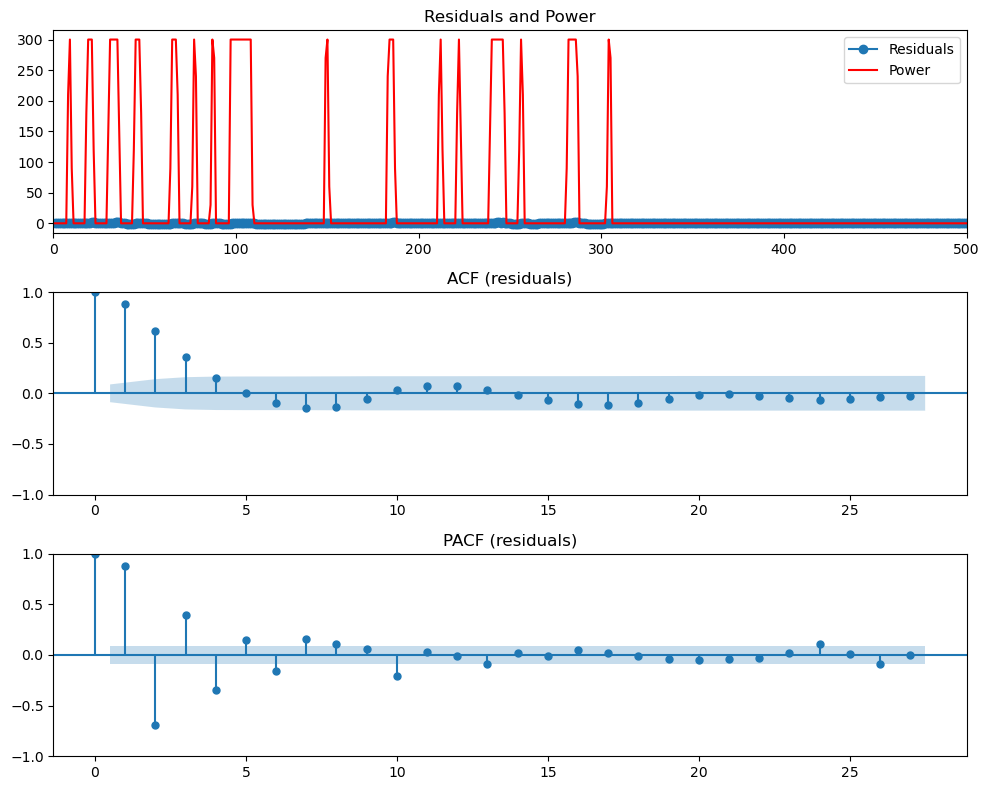

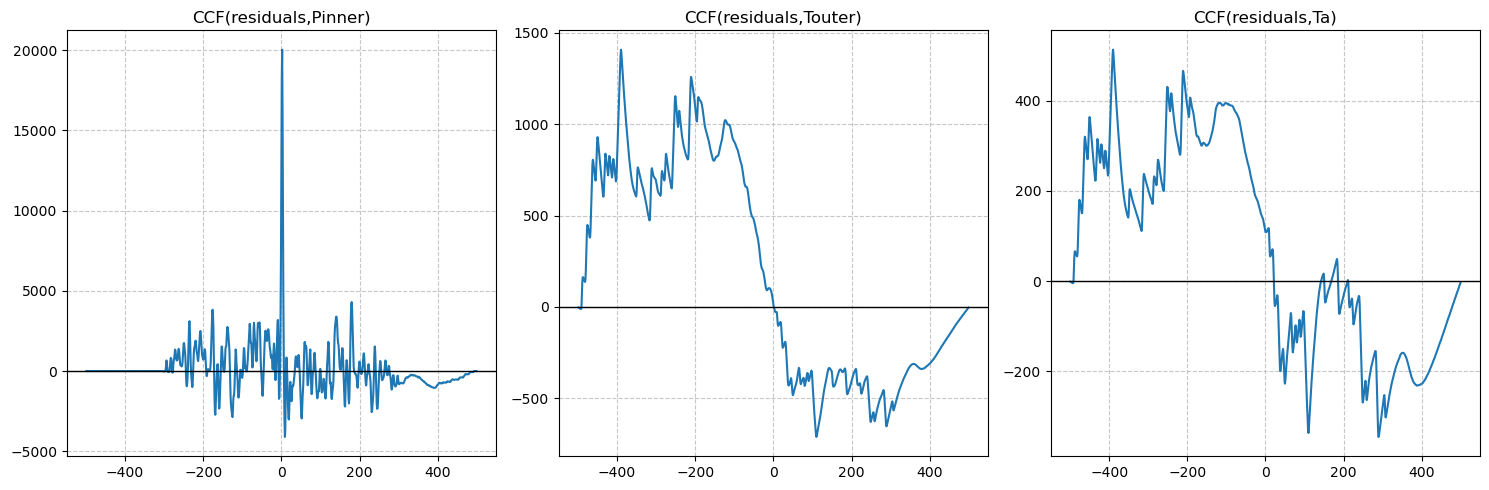

In [6]:
# Validation plot
validate(fit,X)
# CCF plot
ccfplot(fit, X)

In [10]:

# Do you know the stepping function?
fit = OLS.from_formula(ARX("Tinner", ["Touter"], 6), data=X).fit()
print(fit.summary())
# print(summary(step(fit)))  # Need to implement step function or use alternative

# The AIC
print(f"AIC: {fit.aic}")

                                 OLS Regression Results                                
Dep. Variable:                 Tinner   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.767e+06
Date:                Thu, 04 Apr 2024   Prob (F-statistic):                        0.00
Time:                        11:33:30   Log-Likelihood:                          308.20
No. Observations:                 495   AIC:                                     -592.4
Df Residuals:                     483   BIC:                                     -541.9
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [11]:

X = X.iloc[:, :6]  # Assuming you only need the first 6 columns
fit = ARIMA.from_formula("Tinner ~ AR(1:2) + Touter(1:2) + MA(1:2)", data=X)
print(fit.summary())
validate(fit)

AttributeError: type object 'ARIMA' has no attribute 'from_formula'